From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).


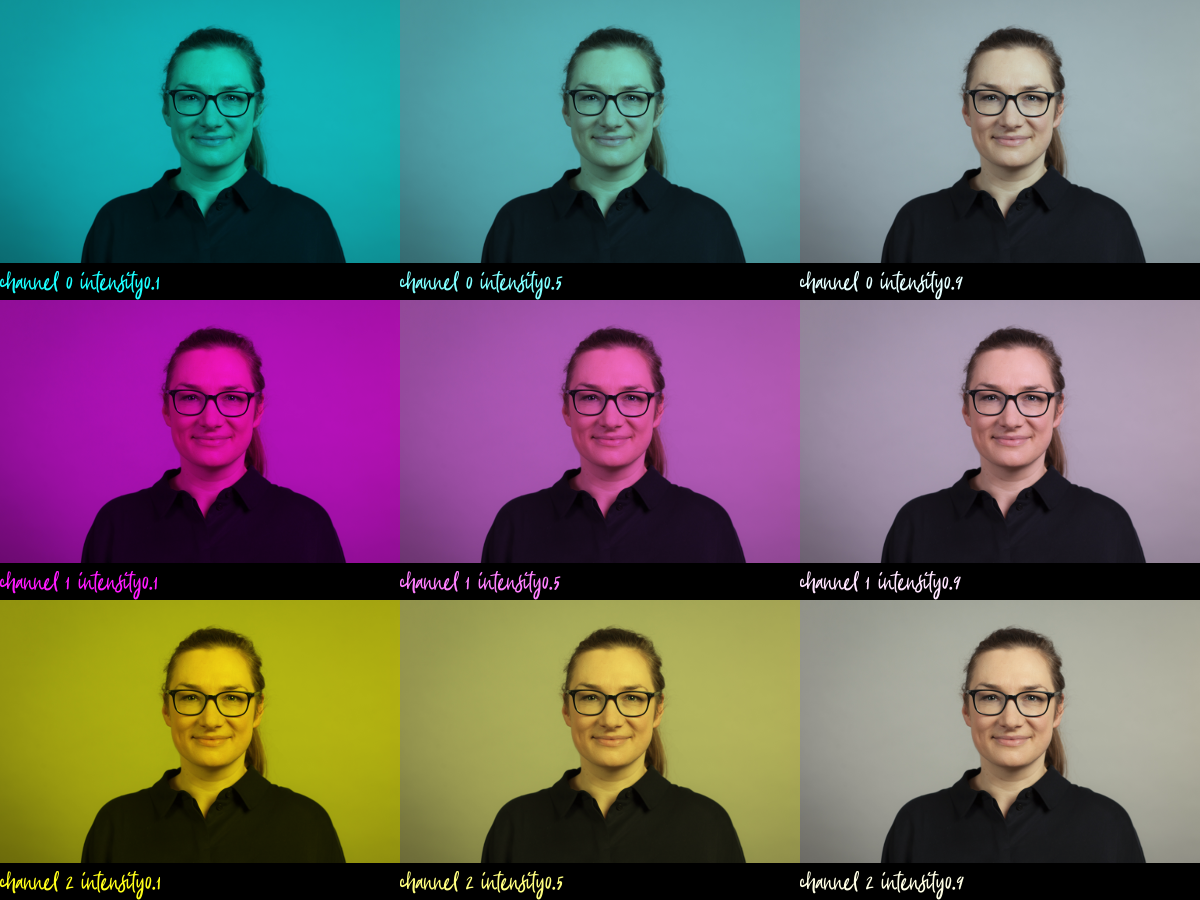

In [7]:
 
 
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw


# read image and convert to RGB
image=Image.open("desktop/assignment.png")
orig_width, orig_height = image.size
orig=image.convert('RGB')
#display(image)
#orig.save("readonly/msi_recruitment.gif")


intensity = [0.1, 0.5, 0.9]
pics = list(range(1,10))
colors = [0, 1, 2] #red, green, blue

images = []
row = range(orig_width)
col = range(orig_height)


def new_color(color, intens):
    return color * intens

def change_colors(image, intens):
    for x in row: 
        for y in col:
            r,g,b = image.getpixel((x,y))
            
            if color == 0:
                new_r = int(new_color(r, intens))
                image.putpixel((x,y), (new_r,g,b)) ## hier gibts noch was zu tun
            
            elif color == 1:
                new_g = int(new_color(g, intens))
                image.putpixel((x,y), (r,new_g,b)) 
                
            elif color == 2:
                new_b = int(new_color(b, intens))
                image.putpixel((x,y), (r,g,new_b)) 
                
    return image


#image = orig.copy()



#for each of the three rows of the grid to create, create 3 images with each a different intensity in one of the rgb-color channels
#first row, first channel:
for color in colors:
    for intens in intensity:
    
        #for r in pics[0:3]:
            #create a copy of the original image
            image = orig.copy()
            #now create the "subtitle"
            #draw black rectangle to the bottom of the image with information about the image
            draw = ImageDraw.Draw(image)
            font = ImageFont.truetype("readonly/Aescudos.ttf", 25)
            #width, height = img.size
            a, b = (orig_width, orig_height)
            text = "channel {} intensity{}".format(color, intens)
            w, h = font.getsize(text)
            #draw rectangle
            draw.rectangle((0, b - h, a, b ), fill='black')
            draw.text((0, b - h), text, fill='white', font=font)
        
        #continue with changing the color of the image
            #for x in row: 
                #for y in col:
                   # r,g,b = image.getpixel((x,y))
                    #new_r = int(new_color(r, intens))
                    #image.putpixel((x,y), (new_r,g,b))
            change_colors(image, intens)
            images.append(image)
#display(image)

#Create Contact sheet for the Grid 
first_image=images[0]

contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0
for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width
display(contact_sheet)
                   
